In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url="http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
#get the title of the html
soup.title

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>

In [6]:
#the text
soup.get_text()

'\n\n\n\n\n\n\n2017 Intel Great Place to Run 10K \\ Urban Clash Games Race Results\n\n\n\n\n\n\r\n        @media print {\r\n            .noprint {\r\n                display: none;\r\n            }\r\n\r\n            .dataTables_filter {\r\n                display: none;\r\n            }\r\n        }\r\n        #individualResults tbody tr {\r\n            cursor: pointer;\r\n        }\r\n        .video-container {\r\n            position: relative;\r\n            padding-bottom: 56.25%; /* 16:9 */\r\n            padding-top: 25px;\r\n            height: 0;\r\n        }\r\n        .video-container iframe {\r\n            position: absolute;\r\n            top: 0;\r\n            left: 0;\r\n            width: 100%;\r\n            height: 100%;\r\n        }\r\n        .dataTables_wrapper .dataTables_paginate {\r\n            float: right;\r\n            text-align: right;\r\n            padding-top: 0.25em;\r\n        }\r\n        .dataTables_wrapper .dataTables_paginate .paginate_button 

In [7]:
#find hyperlinks
soup.find_all('a')

[<a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a href="http://hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="#tabs-1" style="font-size: 18px">Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="http://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="http://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [10]:
links = soup.find_all('a')
for link in links:
    print(link.get('href'))

/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [23]:
rows = soup.find_all('tr')
#rows

In [93]:
list_rows = []
for row in rows:
    row_td = row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
    list_rows.append(cleantext.split(', '))

In [94]:
df = pd.DataFrame(list_rows)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]


In [95]:
col_labels = soup.find_all('th')
col_labels

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Time</th>,
 <th>Chip Pace</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>,
 <th>Team</th>]

In [96]:
col_labels = BeautifulSoup(str(col_labels), 'lxml').get_text().split(', ')
col_labels

['[Place',
 'Bib',
 'Name',
 'Gender',
 'City',
 'State',
 'Chip Time',
 'Chip Pace',
 'Gender Place',
 'Age Group',
 'Age Group Place',
 'Time to Start',
 'Gun Time',
 'Team]']

In [97]:
df.columns = col_labels
df.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
1,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
2,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
3,[],None,None,None,None,None,None,None,None,None,None,None,None,None
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]


In [98]:
display(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 14 columns):
[Place             596 non-null object
Bib                595 non-null object
Name               592 non-null object
Gender             592 non-null object
City               592 non-null object
State              592 non-null object
Chip Time          592 non-null object
Chip Pace          577 non-null object
Gender Place       577 non-null object
Age Group          577 non-null object
Age Group Place    577 non-null object
Time to Start      577 non-null object
Gun Time           577 non-null object
Team]              577 non-null object
dtypes: object(14)
memory usage: 65.3+ KB


None

(596, 14)

In [99]:
df2 = df.dropna(axis=0, how='any')
df2.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [100]:
df2.columns

Index(['[Place', 'Bib', 'Name', 'Gender', 'City', 'State', 'Chip Time',
       'Chip Pace', 'Gender Place', 'Age Group', 'Age Group Place',
       'Time to Start', 'Gun Time', 'Team]'],
      dtype='object')

In [101]:
df2.rename(columns={'[Place':'Place'}, inplace=True)
df2.rename(columns={'Team]':'Team'}, inplace=True)
df2.head()

C:\Users\Noah\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
4,[1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,]
5,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F]
6,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,]
7,[4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,]
8,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F]


In [102]:
df2['Place']  = df2['Place'].str.strip('[')
df2.Team = df2.Team.str.strip(']')
df2 = df2.reset_index(drop=True)
df2.head()

C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Noah\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
0,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,
3,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F


In [103]:
df2['Chip Time'] = pd.to_datetime(df2['Chip Time'], format='%H:%M:%S').dt.time


In [105]:
time_list = df2['Chip Time'].tolist()

In [59]:
time_list

[datetime.time(0, 36, 21),
 datetime.time(0, 36, 42),
 datetime.time(0, 37, 44),
 datetime.time(0, 38, 34),
 datetime.time(0, 39, 21),
 datetime.time(0, 39, 49),
 datetime.time(0, 40, 4),
 datetime.time(0, 40, 5),
 datetime.time(0, 40, 17),
 datetime.time(0, 40, 21),
 datetime.time(0, 40, 28),
 datetime.time(0, 40, 36),
 datetime.time(0, 40, 43),
 datetime.time(0, 41, 1),
 datetime.time(0, 41, 19),
 datetime.time(0, 41, 43),
 datetime.time(0, 41, 59),
 datetime.time(0, 42, 23),
 datetime.time(0, 42, 29),
 datetime.time(0, 42, 35),
 datetime.time(0, 42, 36),
 datetime.time(0, 42, 37),
 datetime.time(0, 42, 56),
 datetime.time(0, 43, 26),
 datetime.time(0, 43, 27),
 datetime.time(0, 43, 40),
 datetime.time(0, 43, 42),
 datetime.time(0, 43, 43),
 datetime.time(0, 43, 46),
 datetime.time(0, 43, 46),
 datetime.time(0, 43, 47),
 datetime.time(0, 43, 47),
 datetime.time(0, 44, 4),
 datetime.time(0, 44, 5),
 datetime.time(0, 44, 6),
 datetime.time(0, 44, 7),
 datetime.time(0, 44, 23),
 datetim

In [106]:
time_min = []
for i in time_list:
    time_min.append(i.hour*60+i.minute+i.second/60)

In [107]:
time_min

[36.35,
 36.7,
 37.733333333333334,
 38.56666666666667,
 39.35,
 39.81666666666667,
 40.06666666666667,
 40.083333333333336,
 40.28333333333333,
 40.35,
 40.46666666666667,
 40.6,
 40.71666666666667,
 41.016666666666666,
 41.31666666666667,
 41.71666666666667,
 41.983333333333334,
 42.38333333333333,
 42.483333333333334,
 42.583333333333336,
 42.6,
 42.61666666666667,
 42.93333333333333,
 43.43333333333333,
 43.45,
 43.666666666666664,
 43.7,
 43.71666666666667,
 43.766666666666666,
 43.766666666666666,
 43.78333333333333,
 43.78333333333333,
 44.06666666666667,
 44.083333333333336,
 44.1,
 44.11666666666667,
 44.38333333333333,
 44.63333333333333,
 44.68333333333333,
 44.7,
 44.8,
 45.05,
 45.083333333333336,
 45.166666666666664,
 45.18333333333333,
 45.18333333333333,
 45.21666666666667,
 45.233333333333334,
 45.25,
 45.28333333333333,
 45.45,
 45.46666666666667,
 45.483333333333334,
 45.6,
 45.6,
 45.666666666666664,
 45.666666666666664,
 45.81666666666667,
 45.916666666666664,
 46.

In [108]:
df2['mins'] = time_min
df2.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,mins
0,1,814,JARED WILSON,M,TIGARD,OR,00:36:21,05:51,1 of 414,M 36-45,1 of 152,00:00:03,00:36:24,,36.350000
1,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,00:36:42,05:55,2 of 414,M 26-35,1 of 154,00:00:03,00:36:45,INTEL TEAM F,36.700000
2,3,687,FRANCISCO MAYA,M,PORTLAND,OR,00:37:44,06:05,3 of 414,M 46-55,1 of 64,00:00:04,00:37:48,,37.733333
3,4,623,PAUL MORROW,M,BEAVERTON,OR,00:38:34,06:13,4 of 414,M 36-45,2 of 152,00:00:03,00:38:37,,38.566667
4,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,00:39:21,06:20,5 of 414,M 26-35,2 of 154,00:00:03,00:39:24,INTEL TEAM F,39.350000


In [109]:
#calculate statistics for numeric columns only
df2.describe(include=[np.number])

,mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [110]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

([<matplotlib.axis.XTick at 0x1e526a730f0>],
 <a list of 1 Text xticklabel objects>)

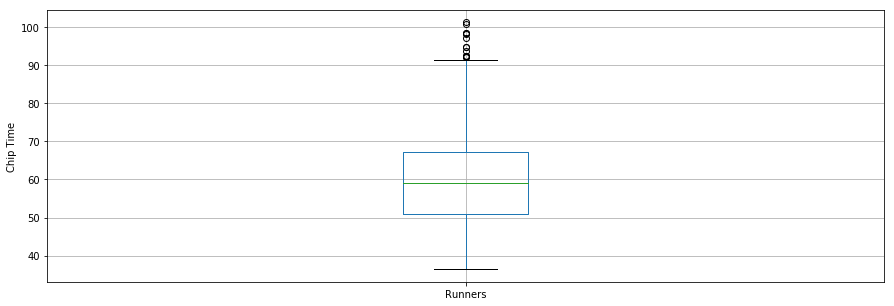

In [111]:
df2.boxplot(column='mins')
plt.grid(True, axis ='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

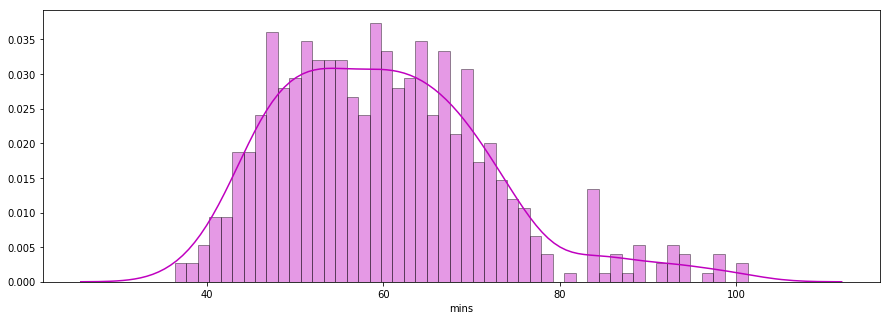

In [112]:
x=df2['mins']
ax=sns.distplot(x, hist =True, kde=True, rug=False, color='m', bins=50, hist_kws={'edgecolor':'black'})
plt.show()

In [113]:
f_fuko = df2.query('Gender =="F"').mins
m_fuko = df2.query('Gender == "M"').mins

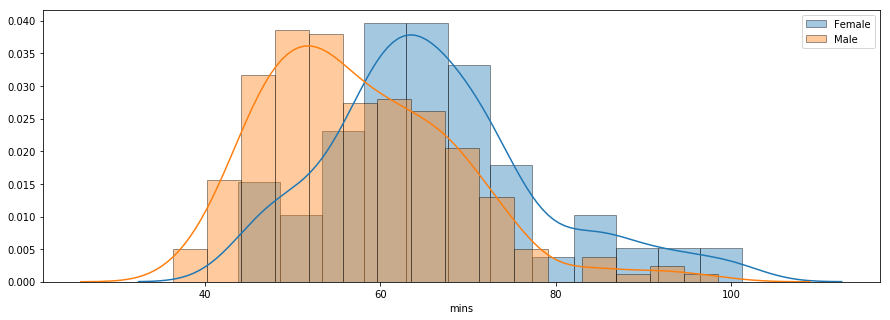

In [114]:
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Female')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor': 'black'}, label='Male')
plt.legend();

In [115]:
g_stats = df2.groupby('Gender', as_index=True).describe()
g_stats

mins                                                         \
        count       mean        std        min        25%        50%   
Gender                                                                 
F       163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M       414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               
              75%         max  
Gender                         
F       72.058333  101.300000  
M       64.804167   98.516667

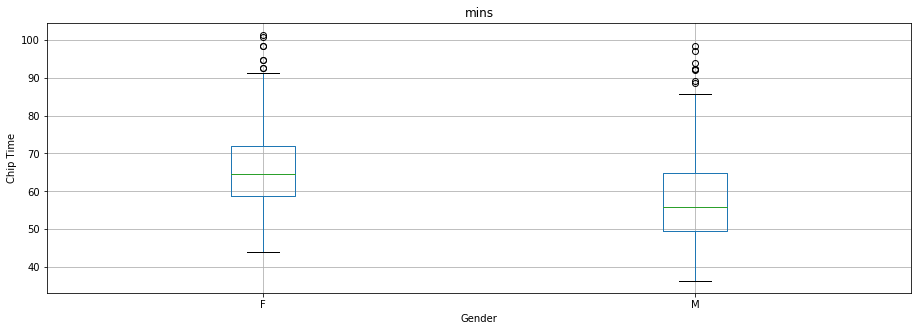

In [118]:
df2.boxplot(column='mins', by='Gender')
plt.ylabel('Chip Time')
plt.suptitle("");